# SMS Spam or Ham Prediction.

# Objective and Problem Statement

Problem Statement : We receive lot of mails these days. We need to know what all mails are good(ham) or bad(spam).

Objective : To find the mails which are SPAM or HAM.


# Importing the required Libraries.

In [3]:
#importing libraries
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')
import matplotlib.pyplot as plt
import seaborn as sns
import re,string,unicodedata

import warnings
warnings.filterwarnings('ignore')

# Train Test SPlit
from sklearn.model_selection import train_test_split

# Performance Measure
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Cross Validation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Model Fitting
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rusta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Reading the dataset

In [4]:
#reading dataset
df=pd.read_csv('SMSSpamCollection.csv')

# Dataset Exploration

To know the characteristics of the text data and understand the structure

In [5]:
df

,Class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# Count of SPAM or HAM mails

<AxesSubplot:>

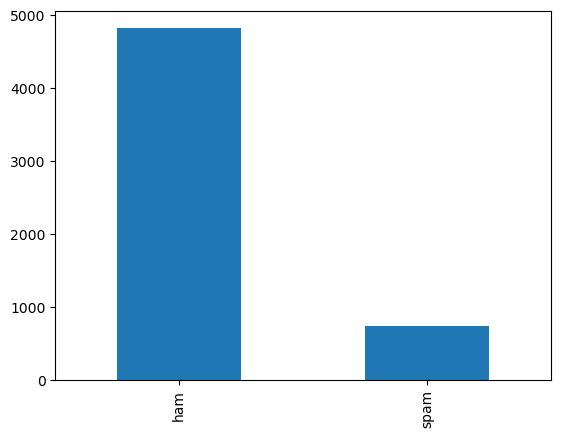

In [4]:
#Checking counts of Ham and spam
df['Class'].value_counts().plot(kind='bar')

From the graph above, we could easily see that most of the mails are Ham i.e. good mails. Count of Spam mails are very lesser.

# Text Data Pre-Processing and Data Cleaning

In [5]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
from nltk.corpus import stopwords
import string

# Prepare the textual data for analysis.

Tokenization, Stopwords and Stemming


By Tokenization, we split a phrase, a sentence, a paragraph or an entire text document into smaller units known as Tokens. It also helps in finding the count of words, characters, etc.


'Stopwords' is the common pre-processing method in which we filter-out the words. Stopwords removal....


'Stemming' helps in lesser input dimensions.

In [6]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [7]:
def TextTransform(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [8]:
df['transformed_text'] = df['sms'].apply(TextTransform)
df['transformed_text'] = df['transformed_text'].apply(clean_text)

In [9]:
import nltk

In [10]:
#num of characters
df['num_characters'] = df['transformed_text'].apply(len)
# num of words
df['num_words'] = df['transformed_text'].apply(lambda x:len(nltk.word_tokenize(x)))
#num of sentences
df['num_sentences'] = df['transformed_text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [11]:
df.head()

,Class,sms,transformed_text,num_characters,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...,76,16,1
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,21,6,1
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt ma...,100,20,1
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,35,9,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though,36,7,1


We have come to know the number of characters and the number of words present in our dataset in a sentence or a row.

In [12]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5572.000000,5572.000000,5572.000000
mean,44.182161,8.474695,0.997846
std,33.390538,6.173310,0.046361
min,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000
50%,34.000000,7.000000,1.000000
75%,65.000000,12.000000,1.000000
max,394.000000,74.000000,1.000000


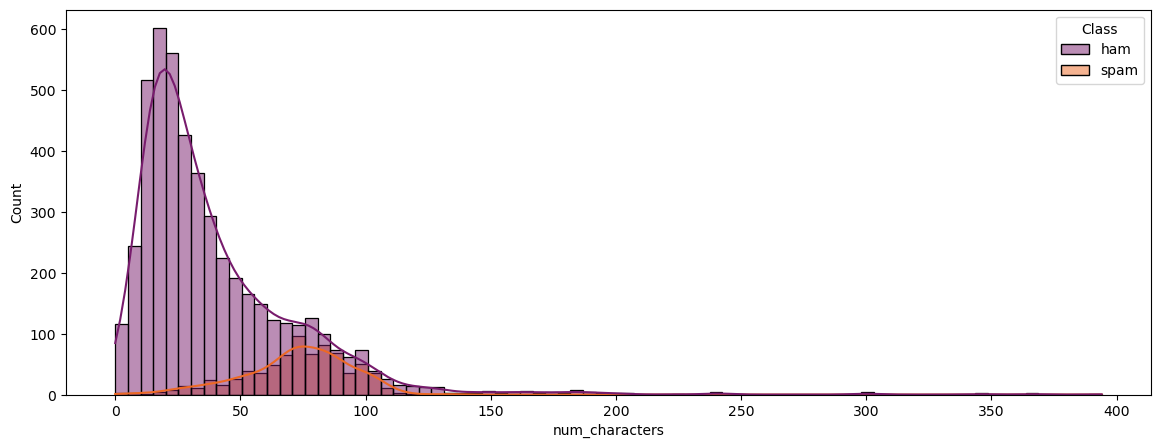

In [13]:
plt.figure(figsize=(14,5))
sns.histplot(data=df,x='num_characters',hue="Class",palette="inferno",kde=True); 

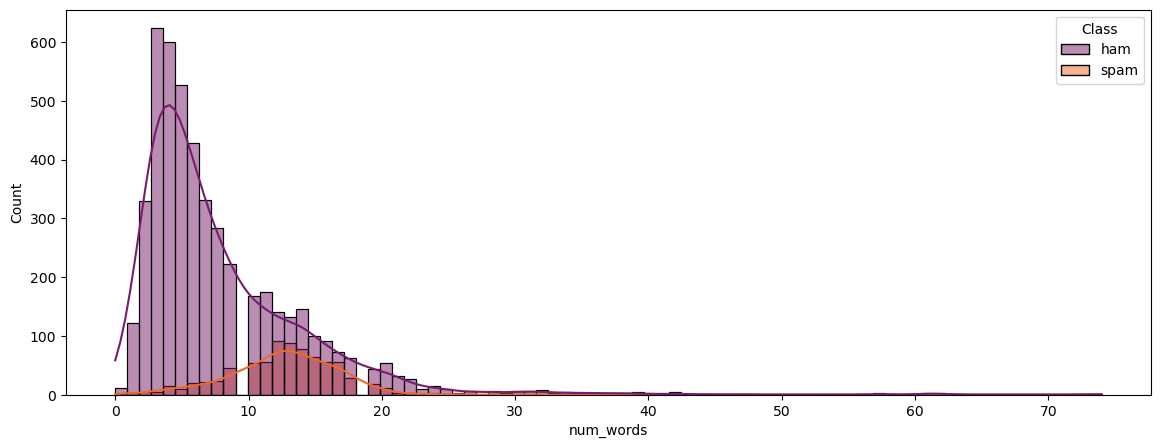

In [14]:
plt.figure(figsize=(14,5))
sns.histplot(data = df,hue='Class',x='num_words',palette="inferno", kde=True); 

<Figure size 1400x500 with 0 Axes>

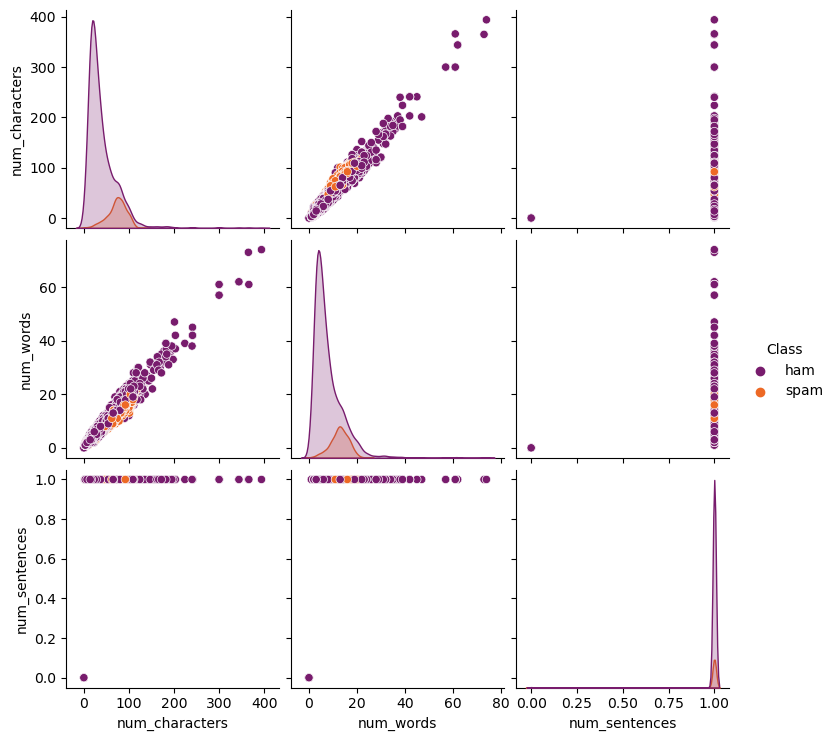

In [15]:
plt.figure(figsize=(14,5))
sns.pairplot(df,hue='Class',palette='inferno');

We could clearly see that there is a linear relationship with the Upward trend in the above graphs of words and characters.

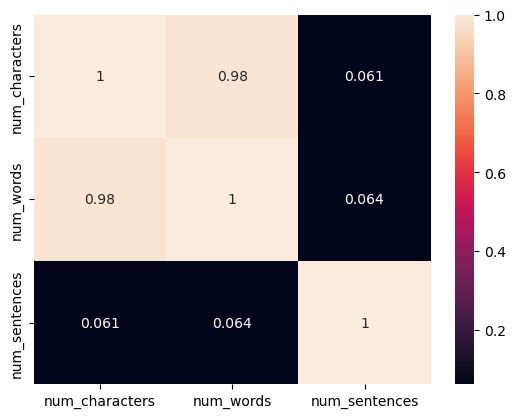

In [16]:
sns.heatmap(df.corr(),annot=True);

Words and Characters are highly cor-related.

# Wordcloud

A Word Cloud is a collection or cluster of words depicted in different sizes. 
The bigger and bolder the word appears, the more often it is selected/voted for by an audience member. 
Word Clouds are a powerful way to visualise what your audience really thinks about a topic.

In [17]:
from wordcloud import WordCloud
wc= WordCloud(width=500,height=500, min_font_size = 10, background_color='black')

In [18]:
spam_wordcloud = wc.generate(df[df['Class']=="spam"]['transformed_text'].str.cat(sep=" "))

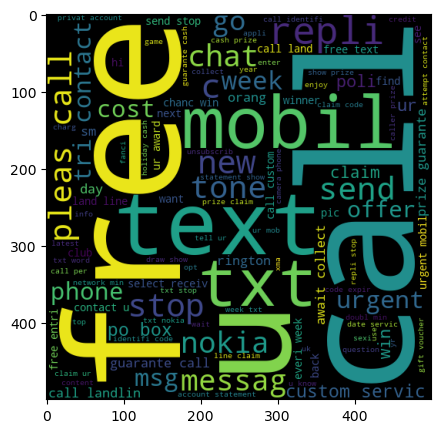

In [19]:
plt.figure(figsize=(14,5))
plt.imshow(spam_wordcloud)


Words that are mostly thought of by the audience in SPAM mails are : Free, Call, Text, Mobil, Pleas call

In [20]:
ham_wordcloud = wc.generate(df[df['Class']=="ham"]['transformed_text'].str.cat(sep=" "))

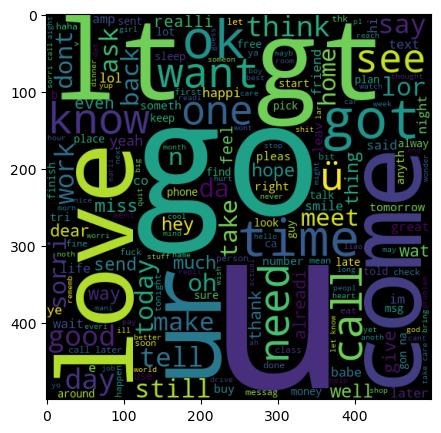

In [21]:
plt.figure(figsize=(14,5))
plt.imshow(ham_wordcloud)

Words that are mostly thought of by the audience in HAM mails are : Love, Go, Come, Gt, It, U.

In [22]:
spam_corpus = []
for msg in df[df['Class'] == "ham"]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [23]:
spam_corpus = []
for msg in df[df['Class'] == "spam"]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

Text(0.5, 1.0, 'Most Common Spam Messages')

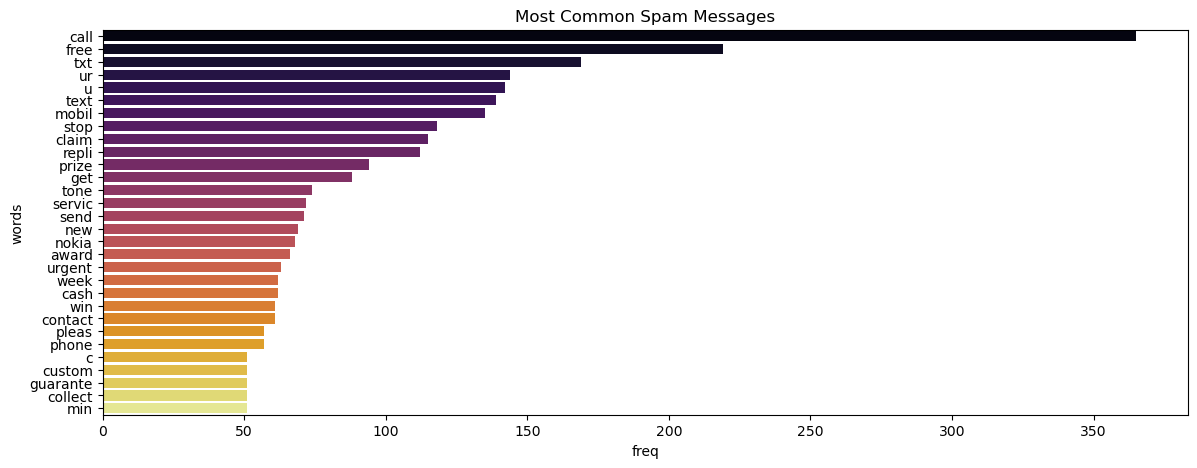

In [24]:
from collections import Counter
most_common_messages = pd.DataFrame(Counter(spam_corpus).most_common(30))
most_common_messages.columns = ["words","freq"]
plt.figure(figsize=(14,5))
sns.barplot(data = most_common_messages,y="words",x="freq", palette = 'inferno');
plt.title("Most Common Spam Messages")
# plt.xticks(rotations='vertical')

Most common SPAM Messages with the highest frequency : 'call' - more than 350 in frequency and then 'free' - more than 200.

In [25]:
ham_corpus = []
for msg in df[df['Class'] == "ham"]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

Text(0.5, 1.0, 'Most Common Ham Messages')

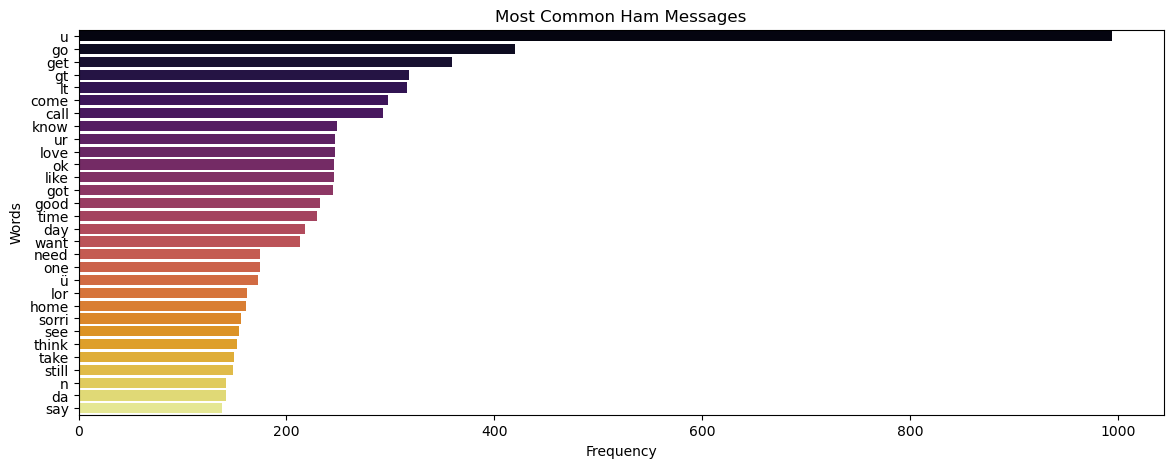

In [26]:
from collections import Counter
most_common_ham = pd.DataFrame(Counter(ham_corpus).most_common(30))
most_common_ham.columns = ["Words","Frequency"]
plt.figure(figsize=(14,5))
sns.barplot(data = most_common_ham,y="Words",x="Frequency", palette = 'inferno');
plt.title("Most Common Ham Messages")
# plt.xticks(rotations='vertical')

Most common HAM Messages with the highest frequency : 'u' - more than 950 in frequency and then 'go' - more than 400.

## Model Building

## Vectorization

In [27]:
df_models=pd.DataFrame()
def results(model_number,model_name,y_true, y_pred, df_models):
    print(classification_report(y_true, y_pred))
    print(confusion_matrix(y_true, y_pred))
    precise = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    df_models = df_models.append({"Model Number":model_number, "Model Name":model_name, " Test F1 Score":f1, 
                                    "Test Accuracy":accuracy, "Test Precision":precise, "Test Recall":recall},
                                ignore_index = True)
    return df_models

In [28]:
# Parameter declaration for Grid Search CV

## Tuning Parameters for Logistic Regression
params_logit = {'solver' :['newton-cg', 'lbfgs', 'liblinear'] , 'penalty' : ['l2'], 
                'C' : [100, 10, 1.0, 0.1]}

## Tuning Parameters for Decision Tree Classifier
params_dtf = {'max_depth': [40, 50, 60, 70], 'min_samples_leaf': [5, 10, 20, 50], 
              'criterion': ["gini", "entropy"]}

## Tuning Parameters for Random Forest Classifier
params_rfc = { "max_depth" : [5,7,9,11,13], "max_leaf_nodes" : [10,15,20], 
              "min_samples_leaf" : [3,5,7,9], "n_estimators" : [50]}

## Tuning Parameters for Ada Boost Classifier
params_adc = {"n_estimators" : [100,150,200,250, 300, 350, 400]}


## Tuning Parameters for K-Neigbors Classifier
params_knn = {"n_neighbors": range(1, 21, 2), "weights": ['uniform', 'distance'],
               "metric": ['euclidean', 'manhattan']}

## Tuning Parameters for Gradiant Boosting Classifier
params_gb = {"learning_rate": [0.001, 0.01, 0.1], "n_estimators": [10, 100, 1000], 
              'subsample': [0.5, 0.7, 1.0], 'max_depth': [3, 7, 9]}

In [29]:
def best_params(X, y, param_grid, model):
    grid_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs=-1, cv=5, scoring='f1',
                               error_score=0, verbose = 10)
    grid_result = grid_search.fit(X, y)
    
    # Printing the Result
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    

### Vectorization using CountVectorizer

CountVectorizer is a tool used to vectorize text data, meaning that it will convert text into numerical data that can be used in machine learning algorithms.

The values in the matrix represent the frequency of that word in the document.

This numerical data will form a matrix, where each row represents a document (sentence), and each column represents a word.

CountVectorizer simply counts the number of times a word appears in a document (using a bag-of-words approach).

These embeddings, created from your corpus (or dataset), are critical in any model building down the line, and non-zero entities in your matrix represent words that don’t exist.

In [30]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [31]:
# Using count vectoroizer to create a document-term matrix
cv = CountVectorizer()
transform = cv.fit_transform(df.transformed_text)
names = cv.get_feature_names()

# Converting the document-term matrix to a dataframe
DTM_TF = pd.DataFrame(data=transform.toarray(), columns=names)
DTM_TF

C:\Users\jivit\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aah,aaniy,aaooooright,aathi,ab,abbey,abdomen,abeg,abel,...,zed,zero,zhong,zindgi,zoe,zogtoriu,zoom,zouk,zyada,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### B. Vectorization using TF-IDF

TF-IDF Vectorizer takes into account not only how many times a word appears in a document but also how important that word is to the whole corpus.

This is done by penalizing words that often appear across all documents, reducing the count of these as these words are likely to be less important.

TF-IDF will usually be much stronger in modeled data. 

In our dataset,(building a spam classifier), TF-IDF will prove to provide embeddings that will allow much more accurate machine-learning models to be built.

TF: Term Frequency, which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization:

TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).

IDF: Inverse Document Frequency, which measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following:

IDF(t) = log_e(Total number of documents / Number of documents with term t in it).

See below for a simple example.

Example:

Consider a document containing 100 words wherein the word cat appears 3 times.

The term frequency (i.e., tf) for cat is then (3 / 100) = 0.03. Now, assume we have 10 million documents and the word cat appears in one thousand of these. Then, the inverse document frequency (i.e., idf) is calculated as log(10,000,000 / 1,000) = 4. Thus, the Tf-idf weight is the product of these quantities: 0.03 * 4 = 0.12.

In [32]:
tfidf_vec = TfidfVectorizer()
tfidf_vectors = tfidf_vec.fit_transform(df.transformed_text)

names = tfidf_vec.get_feature_names()

tfidf_vectors = tfidf_vectors.toarray()

tfidf_vectors = pd.DataFrame(tfidf_vectors, columns=names)
tfidf_vectors

C:\Users\jivit\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aah,aaniy,aaooooright,aathi,ab,abbey,abdomen,abeg,abel,...,zed,zero,zhong,zindgi,zoe,zogtoriu,zoom,zouk,zyada,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Fitting models using Count Vectorized data

In [33]:
df['Class'].replace({"ham":0,"spam":1},inplace=True)
y=df['Class']

In [42]:
X_train, X_valid, y_train, y_valid = train_test_split(DTM_TF, y, test_size = 0.3)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.3)

In [46]:
lr = LogisticRegression()
best_params(X_train, y_train, params_logit, lr)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best: 0.881254 using {'solver': 'newton-cg', 'penalty': 'l2', 'C': 100}


In [44]:
lr = LogisticRegression(penalty = 'l2', solver = 'liblinear', C = 100)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
df_models = results('1',"CV Logistic Regression",y_test, y_pred, df_models)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1015
           1       0.94      0.86      0.90       155

    accuracy                           0.97      1170
   macro avg       0.96      0.92      0.94      1170
weighted avg       0.97      0.97      0.97      1170

[[1006    9]
 [  22  133]]


C:\Users\jivit\AppData\Local\Temp\ipykernel_4748\1436042976.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append({"Model Number":model_number, "Model Name":model_name, " Test F1 Score":f1,


In [45]:
dtc = DecisionTreeClassifier()
best_params(X_train, y_train, params_dtf, dtc)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best: 0.757780 using {'min_samples_leaf': 5, 'max_depth': 40, 'criterion': 'gini'}


In [ ]:

dtc = DecisionTreeClassifier(max_depth = 40, min_samples_leaf = 5, criterion = 'gini')
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
df_models = results('2',"CV Decision Tree Classsifier",y_test, y_pred, df_models)

In [47]:
rfc = RandomForestClassifier()
best_params(X_train, y_train, params_rfc, rfc)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best: 0.223651 using {'n_estimators': 50, 'min_samples_leaf': 3, 'max_leaf_nodes': 15, 'max_depth': 9}


In [ ]:
rfc = RandomForestClassifier(max_depth = 9, max_leaf_nodes = 15, min_samples_leaf = 3, 
                             n_estimators = 50)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
df_models = results('3',"CV Random Forest Classifier",y_test, y_pred, df_models)

In [ ]:
gb = GradientBoostingClassifier()
best_params(X_train, y_train, params_adc, gb)

C:\Users\jivit\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 7 candidates, totalling 35 fits


In [ ]:
gb = GradientBoostingClassifier(n_estimators = 100,learning_rate=0.01,max_depth=9,subsample=1)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
df_models = results('4',"CV GradientBoostingClassifier",y_test, y_pred, df_models)

In [ ]:
df_models

In [35]:
X=tfidf_vectors
y=df['Class']

In [36]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.3)

In [37]:
lr = LogisticRegression()
best_params(X_train, y_train, params_logit, lr)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best: 0.881254 using {'solver': 'lbfgs', 'penalty': 'l2', 'C': 100}


C:\Users\jivit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
lr = LogisticRegression(penalty = 'l2', solver = 'lbfgs', C = 100)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
df_models = results('5',"Tfidf Logistic Regression",y_test, y_pred, df_models)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1011
           1       0.98      0.87      0.92       159

    accuracy                           0.98      1170
   macro avg       0.98      0.93      0.95      1170
weighted avg       0.98      0.98      0.98      1170

[[1008    3]
 [  21  138]]


C:\Users\jivit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jivit\AppData\Local\Temp\ipykernel_8260\1436042976.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append({"Model Number":model_number, "Model Name":model_name, " Test F1 Score":f1,


In [40]:
dtc = DecisionTreeClassifier()
best_params(X_train, y_train, params_dtf, dtc)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best: 0.724408 using {'min_samples_leaf': 5, 'max_depth': 60, 'criterion': 'gini'}


In [41]:
dtc = DecisionTreeClassifier(max_depth = 60, min_samples_leaf = 5, criterion = 'gini')
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
df_models = results('6',"Tfidf Decision Tree Classsifier",y_test, y_pred, df_models)

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1011
           1       0.79      0.75      0.77       159

    accuracy                           0.94      1170
   macro avg       0.88      0.86      0.87      1170
weighted avg       0.94      0.94      0.94      1170

[[979  32]
 [ 39 120]]


C:\Users\jivit\AppData\Local\Temp\ipykernel_8260\1436042976.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append({"Model Number":model_number, "Model Name":model_name, " Test F1 Score":f1,


In [42]:
rfc = RandomForestClassifier()
best_params(X_train, y_train, params_rfc, rfc)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best: 0.416241 using {'n_estimators': 50, 'min_samples_leaf': 3, 'max_leaf_nodes': 20, 'max_depth': 13}


In [43]:
rfc = RandomForestClassifier(max_depth = 13, max_leaf_nodes = 20, min_samples_leaf = 3, 
                             n_estimators = 50)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
df_models = results('7',"TfiDF Random Forest Classifier",y_test, y_pred, df_models)

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1011
           1       1.00      0.33      0.49       159

    accuracy                           0.91      1170
   macro avg       0.95      0.66      0.72      1170
weighted avg       0.92      0.91      0.89      1170

[[1011    0]
 [ 107   52]]


C:\Users\jivit\AppData\Local\Temp\ipykernel_8260\1436042976.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append({"Model Number":model_number, "Model Name":model_name, " Test F1 Score":f1,


In [44]:
#gb = GradientBoostingClassifier()
#best_params(X_train, y_train, params_adc, gb)

In [ ]:
gb = GradientBoostingClassifier(n_estimators = 100,learning_rate=0.01,max_depth=9,subsample=1)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
df_models = results('8',"TFiDF GradientBoostingClassifier",y_test, y_pred, df_models)

In [45]:
df_models

,Model Number,Model Name,Test F1 Score,Test Accuracy,Test Precision,Test Recall
0,5,Tfidf Logistic Regression,0.920000,0.979487,0.978723,0.867925
1,6,Tfidf Decision Tree Classsifier,0.771704,0.939316,0.789474,0.754717
2,7,CV Random Forest Classifier,0.492891,0.908547,1.000000,0.327044


The model : Tfidf Logistic Regression would be selected as per the above table.

